# Įmonės finansinių rodiklių sąveikos su kitais rodikliais tyrimas (2 dalis)

## Duomenų paruošimas

In [1]:
#%run "P1 (duomenys).ipynb"

In [69]:
import pandas as pd
import numpy as np
from math import exp

In [36]:
import pickle
#fnm = "/content/drive/MyDrive/Colab Notebooks/df3.pckl"
fnm = "df_2024_VLN.pckl"
with open(fnm, "rb") as f:
    df_pzv = pickle.load(f)

In [37]:
df_pzv

,Revenue,Gross Profit,Operating Expenses,Sales per Employee,Operating Income (Loss),Cost of Goods & Services,Profit Margin
2013-03-31,9.95120,1.70790,1.978200,12180.168000,-0.184800,5.990200,-3.23240
2013-06-30,14.27412,2.62575,2.148300,17628.689700,0.995000,5.990200,5.42030
2013-09-30,14.27412,2.62575,1.926000,17293.935751,0.997325,5.990200,6.86640
2013-12-31,9.41860,0.52130,0.417000,12601.524001,0.005700,5.990200,-43.50110
2014-03-31,9.52950,1.33300,1.472800,12217.307500,-0.104500,5.990200,-1.59980
2014-06-30,12.00700,1.97220,1.805600,15988.026900,0.206300,5.990200,1.32850
2014-09-30,11.76860,1.88670,1.550000,15276.657758,0.385900,5.990200,3.03370
2014-12-31,8.81220,1.13570,2.149315,12205.208100,-0.993000,5.990200,-12.69560
2015-03-31,8.40960,0.96770,1.331100,11318.437400,-0.313000,5.990200,-3.44890
2015-06-30,11.97570,2.14420,1.735600,16205.289600,0.466400,5.990200,3.01690


## PCA tyrimas

In [38]:
# pip install --user sklearn
# pip install --user scikit-learn
from sklearn.preprocessing import StandardScaler as scale
from sklearn.decomposition import PCA

### Trumpų kintamųjų vardų paruošimas dėl patogumo

In [39]:
df_pzv.columns.tolist()

['Revenue',
 'Gross Profit',
 'Operating Expenses',
 'Sales per Employee',
 'Operating Income (Loss)',
 'Cost of Goods & Services',
 'Profit Margin']

In [40]:
#df_pzv.rename(index={'(In Millions of EUR except Per Share, 3 Months Ending)': 'd'})

In [41]:
oldnew = list(zip(df_pzv.columns.tolist(), ['rev', 'grp', 'ope', 'spe', 'opi', 'cgs', 'prm'])) #, 'exs'
columns = dict(oldnew)
print(columns)
df_pzv.rename(columns=columns, inplace=True)
df_pzv.head()

{'Revenue': 'rev', 'Gross Profit': 'grp', 'Operating Expenses': 'ope', 'Sales per Employee': 'spe', 'Operating Income (Loss)': 'opi', 'Cost of Goods & Services': 'cgs', 'Profit Margin': 'prm'}


,rev,grp,ope,spe,opi,cgs,prm
2013-03-31,9.95120,1.70790,1.9782,12180.168000,-0.184800,5.9902,-3.2324
2013-06-30,14.27412,2.62575,2.1483,17628.689700,0.995000,5.9902,5.4203
2013-09-30,14.27412,2.62575,1.9260,17293.935751,0.997325,5.9902,6.8664
2013-12-31,9.41860,0.52130,0.4170,12601.524001,0.005700,5.9902,-43.5011
2014-03-31,9.52950,1.33300,1.4728,12217.307500,-0.104500,5.9902,-1.5998


### Duomenų normalizavimas: (x - vidurkis)/standartas

In [42]:
dsc = df_pzv.describe()
dsc.loc[['mean', 'std'], :]

,rev,grp,ope,spe,opi,cgs,prm
mean,9.209663,1.124982,1.350588,13934.078264,-0.429774,6.59034,-9.019941
std,2.581293,0.801713,0.452244,2524.275647,2.109221,1.28674,25.553219


In [43]:
x = scale().fit_transform(df_pzv)
print(type(x))
print(x)

<class 'numpy.ndarray'>
[[ 0.29093299  0.73635235  1.40545282 -0.70366878  0.11762379 -0.4723454
   0.22937504]
 [ 1.98697902  1.89579774  1.78636908  1.48227808  0.68410305 -0.4723454
   0.57230365]
 [ 1.98697902  1.89579774  1.28855788  1.34797479  0.6852194  -0.4723454
   0.62961629]
 [ 0.08197374 -0.76258309 -2.09064639 -0.53462076  0.20909209 -0.4723454
  -1.36657643]
 [ 0.12548403  0.26277162  0.27367692 -0.68876842  0.15617972 -0.4723454
   0.29407915]
 [ 1.09750157  1.07022109  1.01893814  0.82404417  0.30540989 -0.4723454
   0.41013516]
 [ 1.00396818  0.96221588  0.44655602  0.53864288  0.39164457 -0.4723454
   0.47771659]
 [-0.15594006  0.01353855  1.78864204 -0.69362269 -0.27043227 -0.4723454
  -0.14567576]
 [-0.31389536 -0.19868221 -0.04364134 -1.04939509  0.05606875 -0.4723454
   0.22079459]
 [ 1.08522139  1.28749472  0.86218247  0.91120997  0.43029653 -0.4723454
   0.47705076]
 [ 1.98661807  1.86301721  0.91928632  1.48598044  0.63776872 -0.4723454
   0.58683294]
 [ 0.586

### Pagrindinių komponenčių išskyrimas

In [44]:
pca = PCA(n_components=7)
PCs = pca.fit_transform(x)
print("Komponentės (transformuoti kintamieji):")
print(PCs)

Komponentės (transformuoti kintamieji):
[[-4.84195141e-01  4.51969822e-01 -1.42871131e+00 -6.44673545e-01
  -6.89467811e-01 -1.55152543e-02  1.25357085e-01]
 [-3.28866478e+00  9.36176152e-01 -1.46445419e+00  9.69404686e-02
   2.40677663e-01  2.12905967e-01  4.01482800e-03]
 [-3.14696452e+00  6.39246032e-01 -1.26402052e+00  3.96307159e-01
   9.53135949e-02  1.61392837e-01 -8.15100526e-02]
 [ 1.48868800e+00 -6.59622504e-01  7.26230664e-01  1.82347280e+00
  -5.86941146e-02  8.78535480e-01  3.16556092e-01]
 [ 1.61196607e-02 -2.52988086e-01 -7.75249752e-01 -1.07887275e-01
  -5.30268857e-01  3.14340012e-02 -9.48323052e-02]
 [-1.80465230e+00  4.85533546e-01 -9.98996182e-01  9.10632597e-02
   1.94759773e-01  4.87793758e-02 -1.12487262e-01]
 [-1.50836167e+00  4.18975809e-02 -7.78133619e-01  3.41848109e-01
  -1.21386981e-02  5.05759972e-02 -1.61558141e-01]
 [ 2.64017932e-01  8.93061704e-01 -1.37328631e+00 -1.08671431e+00
  -2.54310682e-01  1.16614409e-01  9.95881813e-02]
 [ 7.50044137e-01 -5.111

In [45]:
PCs2 = pd.DataFrame(data=PCs, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
PCs2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.484195,0.451970,-1.428711,-0.644674,-0.689468,-0.015515,0.125357
1,-3.288665,0.936176,-1.464454,0.096940,0.240678,0.212906,0.004015
2,-3.146965,0.639246,-1.264021,0.396307,0.095314,0.161393,-0.081510
3,1.488688,-0.659623,0.726231,1.823473,-0.058694,0.878535,0.316556
4,0.016120,-0.252988,-0.775250,-0.107887,-0.530269,0.031434,-0.094832


In [46]:
print("Komponentės (požymių matrica):")
print(pca.components_)
print("Paaiškinamos dispersijos dalis:")
print(pca.explained_variance_ratio_)
print("Singuliarios reikšmės:")
print(pca.singular_values_)

Komponentės (požymių matrica):
[[-0.49864066 -0.49329151 -0.19901594 -0.46467197 -0.31601186 -0.19426996
  -0.33895322]
 [ 0.21204914  0.11767731  0.49365065  0.14523195 -0.58562143  0.20096671
  -0.54135372]
 [-0.03692165 -0.23465983 -0.47630768  0.24715055 -0.06970722  0.80450414
  -0.05944022]
 [ 0.32618849  0.32138795 -0.68145478  0.1285865  -0.12599279 -0.37411534
  -0.39186639]
 [-0.25310978 -0.38373476  0.0652739   0.81640439  0.02529874 -0.33770663
  -0.05674914]
 [ 0.58976092 -0.56579353  0.10398573 -0.13587777  0.44526776 -0.01991851
  -0.32268223]
 [-0.43214351  0.34217745  0.10187416  0.01977015  0.58098827  0.14226679
  -0.5723724 ]]
Paaiškinamos dispersijos dalis:
[0.48509199 0.2647499  0.15950182 0.04889262 0.03278092 0.00708421
 0.00189855]
Singuliarios reikšmės:
[11.65443078  8.60987638  6.68285194  3.69999089  3.02962979  1.40839588
  0.72910471]


In [47]:
# Duomenis padauginus iš požymių matricos, gauname parindines komponentes
# Tą galima patikrinti:
np.sum(np.matmul(x, pca.components_.transpose()) - PCs)

-5.348152476436496e-15

### Atskirų komponenčių išrašymas

In [48]:
# Pirmosiose komponentėsė yra esminiai kintamieji, kurių tiesiniai dariniai paaiškina daugiausiai sklaidos duomenyse.

In [49]:
# PCA naudinga dimensijų mažinimui, vizualizavimui, klasifikavimui, klasterizavimui, anomalijų paieškai, ...

In [50]:
variables = list(columns.values()) # ['rev', 'ope', 'spe', 'dps', 'rex']
PC1 = pca.components_[0]
formula = "PC1 = "
for i in range(len(variables)):
    if i > 0:
        formula += " + "
    formula += "(" + str(PC1[i]) + "*" + variables[i] + ")"
print(formula)

PC1 = (-0.4986406610740011*rev) + (-0.49329150713786807*grp) + (-0.19901594437580725*ope) + (-0.4646719675672217*spe) + (-0.31601185617043026*opi) + (-0.1942699586904539*cgs) + (-0.33895322164109165*prm)


In [51]:
PC2 = pca.components_[1]
formula = "PC2 = "
for i in range(len(variables)):
    if i > 0:
        formula += " + "
    formula += "(" + str(PC2[i]) + "*" + variables[i] + ")"
print(formula)

PC2 = (0.21204914361909744*rev) + (0.1176773057377038*grp) + (0.4936506539559309*ope) + (0.14523194740214707*spe) + (-0.5856214251323744*opi) + (0.20096671356313517*cgs) + (-0.5413537218611717*prm)


# Įmonės finansinių rodiklių prognozavimas (2-3 dalis)

## GM(1, 1)

In [52]:
x2 = df_pzv["rev"].to_numpy()
#x1 = df_pzv["Operating Expenses"].to_numpy()
#x3 = df_pzv["Operating Income (Loss)"].to_numpy()
label2 = "Pajamos"
label1 = "Veikos išlaidos"
label3 = "Veiklos pajamos"

In [53]:
kom = '''fnm = "../data/df_pzv_X.pckl"
with open(fnm, "rb") as f:
    Y = pickle.load(f)
print(np.shape(Y))'''

In [54]:
import numpy as np

### Sudalijame duomenis į apmokymo ir prognozavimo aibes

In [55]:
n_pr = 3
n_ap = len(x2)-n_pr # np.shape(Y)[1]-1

y = x2[:-n_pr]

### Normuojame duomenis ir randame kaupiamąsias sumas

In [56]:
m = min(y)
M = max(y)
yn = (y-m) / (M-m) + 0.1
y1 = np.cumsum(yn)
#n = len(y1)
yn, y1

(array([0.61802183, 1.1       , 1.1       , 0.55864031, 0.57100496,
        0.8472305 , 0.82065041, 0.49103056, 0.44614321, 0.84374075,
        1.09989743, 0.70201001, 0.29875974, 0.82180994, 0.91655725,
        0.43630947, 0.30872728, 0.79663468, 0.85280518, 0.44674528,
        0.36780777, 0.51520238, 0.63327417, 0.70685998, 0.26467613,
        0.50271509, 0.63739943, 0.22175107, 0.1       , 0.29110013,
        0.61911447, 0.30381041, 0.28831279, 0.57607792, 0.55422516,
        0.3548745 , 0.13478602]),
 array([ 0.61802183,  1.71802183,  2.81802183,  3.37666215,  3.94766711,
         4.7948976 ,  5.61554801,  6.10657857,  6.55272178,  7.39646253,
         8.49635996,  9.19836996,  9.49712971, 10.31893965, 11.2354969 ,
        11.67180638, 11.98053365, 12.77716833, 13.62997351, 14.07671879,
        14.44452655, 14.95972894, 15.5930031 , 16.29986309, 16.56453922,
        17.06725431, 17.70465375, 17.92640482, 18.02640482, 18.31750495,
        18.93661942, 19.24042983, 19.52874262, 20.10

### Sudaroma is sprendžiama lygčių sistema

In [57]:
def ab(y1, yn, n_ap):
    A = []
    #m = (sum(y1[1:]/y1[:-1]))**(1/(n_ap-1)) # improves performance, often but not allways
    for i in range(1, n_ap):
        A.append([-(y1[i]+y1[i-1])/2, 1])
        #A.append([-(y1[i]*(m-1)+y1[i-1]*(m+1))/(2*m), 1])
    B = yn[1:n_ap]
    #print(np.array(A), B, '\n')
    print(np.shape(A), np.shape(B))
    
    # Approximate numpy solution for general case
    AB = np.linalg.lstsq(A, B, rcond=None)
    a, b = AB[0]
    #print(AB, '\n')
    #print("a=", a, "b=", b)
    
    return([a, b])

In [58]:
a, b = ab(y1, yn, n_ap)
a, b

(36, 2) (36,)


(0.027638186806312682, 0.9176780141652695)

In [59]:
# numpy solution for square matrices
# V1
#inverse = np.linalg.inv(A)
#AB = inverse.dot(B)
# V2
#AB = np.linalg.solve(A, B)

In [60]:
# scipy solution for general case
#from scipy.sparse import csc_matrix
#A2 = csc_matrix(A, dtype=float)
#from scipy.sparse.linalg import lsqr
#x, istop, itn, normr = lsqr(A2, B)[:4]
#print(x, istop, itn, normr )

In [61]:
# LinearAlgebra solution for general case
#import LinearAlgebra; LA = LinearAlgebra
#AB = LA.linear_least_squares(A, B)
#(a, b) = AB[0]
#print(AB, '\n')
#print("a=", a, "b=", b)

### Apmokyto modelio braižymas (vis dar normuotoms reikšmėms)

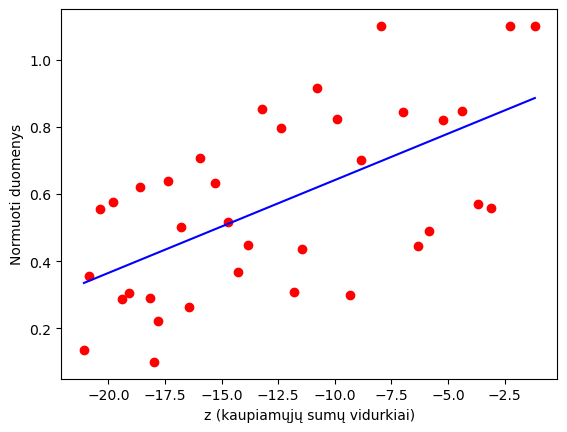

In [62]:
import matplotlib.pyplot as plt
z = []
for i in range(1, len(y1)):
    z.append(-(y1[i]+y1[i-1])/2)
plt.plot(z, yn[1:], 'ro')
plt.plot([min(z), max(z)], np.array([min(z), max(z)])*a+b, 'b-')
plt.xlabel('z (kaupiamųjų sumų vidurkiai)')
plt.ylabel('Normuoti duomenys')
plt.show()

### Prognozių išskaičiavimas

In [63]:
flag_patobulinimas2 = True
class GM11():
    def __init__(self, cumsum, a, b, n_ap,
                 flag_patobulinimas1 = False,
                 flag_patobulinimas2 = False,
                 ka = 2,
                 flag_norm='mM', kintamieji_denormavimui=None):
        self.cumsum = cumsum
        self.a = a
        self.b = b
        self.n_ap = n_ap
        self.flag_patobulinimas1 = flag_patobulinimas1
        self.flag_patobulinimas2 = flag_patobulinimas2
        self.ka = ka
        self.flag_norm = flag_norm
        self.kintamieji_denormavimui = kintamieji_denormavimui
    def prognozuoti(self, n_pirmyn):
        a = self.a
        b = self.b
        n_ap = self.n_ap
        cumsum = self.cumsum
        if self.flag_patobulinimas1:
            cumsump = [cumsum[n_ap-1]]
            for i in range(n_ap-2, -1, -1):
                # Patobulinta versija (prognozės konstruojamos nuo naujausios reikšmės)
                cumsump.insert(0, (cumsum[n_ap-1]-b/a)*exp(-a*(i-(n_ap-1)))+b/a)
            for i in range(n_ap, n_ap+n_pr):
                # Patobulinta versija (prognozės konstruojamos nuo naujausios reikšmės)
                cumsump.append((cumsum[n_ap-1]-b/a)*exp(-a*(i-(n_ap-1)))+b/a)
        else: # Klasika
            cumsump = [cumsum[0]]
            for i in range(1, n_ap+n_pr):
                # Klasikinė versija (prognozės konstruojamos nuo pirmosios reikšmės)
                cumsump.append((cumsum[0]-b/a)*exp(-a*i)+b/a)
        self.cumsump = cumsump
        return(cumsump)
    def galutinePrognozeDenormavimas(self):
        cumsum = self.cumsum
        cumsump = self.cumsump
        # Galutinės prognozės
        yn = np.array(cumsum[1:])-np.array(cumsum[:-1])
        yn = np.insert(yn, 0, yn[0])
        ynp = np.array(cumsump[1:])-np.array(cumsump[:-1])
        ynp = np.insert(ynp, 0, yn[0])
        
        # Skirtumai tarp prognozės ir fakto modeliuojami
        # kaip Furje eilutė
        if self.flag_patobulinimas2:
            cumsum = self.cumsum
            n_ap = self.n_ap
            eps = yn[:n_ap] - ynp[:n_ap]
            n = len(eps)
            #ka = int(n/2-1)
            ka = self.ka
            
            P = np.ones([n, ka*2+1]) * 1/2
            for i in range(ka):
                a = 2 * np.pi * (i+1) * np.arange(1,n+1) / n
                P[:,2*i+1] = np.cos(a)
                P[:,2*i+2] = np.sin(a)
            
            #C = np.dot(np.transpose(P), P)
            #C = np.dot(np.linalg.inv(C), np.transpose(P))
            #C = np.dot(C, eps)
            
            AB = np.linalg.lstsq(P, eps.reshape([n, 1]), rcond=None)
            C = AB[0]
            self.C = C
            
            eps2 = np.ones(n+n_pr) * C[0][0]/2
            for i in range(ka):
                a = 2 * np.pi * (i+1) * np.arange(1,n+n_pr+1) / n
                eps2 += C[2*i+1][0]*np.cos(a)
                eps2 += C[2*i+2][0]*np.sin(a)
            
            #print("ka =", ka)
            #print("eps:", eps)
            #print("eps2:", eps2)
            #print("cumsum:", cumsum)
            #print("ynp:", ynp)
            ynp += eps2
        
        # Duomenų denormavimas
        if self.flag_norm == 'mM':
            m, M = self.kintamieji_denormavimui
            ynp2 = (ynp-0.1)*(M-m)+m
        elif self.flag_norm == 'divFirst':
            x10 = self.kintamieji_denormavimui
            ynp2 = ynp*x10
        return([ynp, ynp2])


$P \cdot C = \varepsilon_0$

In [64]:
#C[0][0]

In [70]:
ob = GM11(y1, a, b, n_ap, False, False)

y1p = ob.prognozuoti(4)
ynp, ynp2 = ob.galutinePrognozeDenormavimas()

print("Kaupiamųjų sumų vidurkių prognozės")
print(y1p)
print("Galutinės prognozės")
print(ynp)
print("Duomenų denormavimas")
print(ynp2)

TypeError: cannot unpack non-iterable NoneType object

### Apmokyto modelio ir prognozių į ateitį braižymas

In [66]:
ob = GM11(y1, a, b, n_ap, True, False)
y1p_orig = ob.prognozuoti(4)
ynp_orig, ynp2_orig = ob.galutinePrognozeDenormavimas()

ob = GM11(y1, a, b, n_ap, True, True, 5)
y1p_imp1 = ob.prognozuoti(4)
ynp_imp1, ynp2_imp1 = ob.galutinePrognozeDenormavimas()
print("a0, a1, b1, a2, b2, ...:", [c[0] for c in ob.C])

TypeError: cannot unpack non-iterable NoneType object

In [67]:
#%debug

NameError: name 'ynp2_orig' is not defined

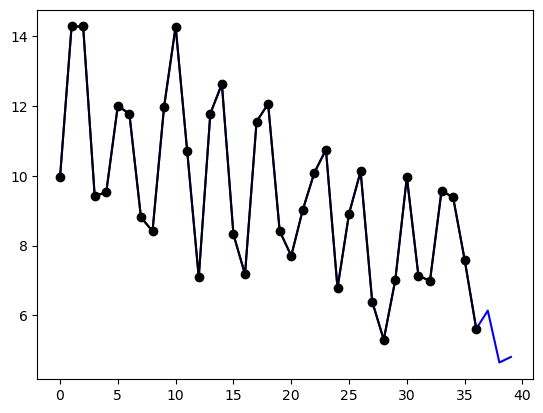

In [68]:
import matplotlib.pyplot as plt
plt.plot(x2, 'b-', label='Realūs duomenys')
plt.plot(y, 'ko-', label='Apmokymo duomenys')
#plt.plot((ynp-0.1)*(M-m)+m, 'ro-')
plt.plot(ynp2_orig, 'ro-', label='Prognozė (orig)')
plt.plot(ynp2_imp1, 'go-', label='Prognozė (imp1)')
plt.xlabel("t")
plt.ylabel(label2)
#plt.gca().set_ylim([0, 2*max(x2)])
plt.legend()
plt.show()

<p>Pagrindiniai pastbėjimai:</p>
<ul>
    <li>GM(1, 1) puikiai tinka eksponentiniai slinksčiai prognozuoti.</li>
    <li>Su Furje eilute galima sumodeliuoti adityvius svyravimus.</li>
    <li>Likusią dalį galima modeliuoti, pvz., su Markovo grandine (o kiek liko šios dalies - tyrimo klausimas, tikrinant paklaida testavimo aibėje).</li>
</ul>

### Modelio paklaidų įvertinimas

In [35]:
for yp in [ynp2_orig, ynp2_imp1]:
    print("===============================")
    x2_apm = y
    x2_tst = x2[-n_pr:]

    yp_apm = yp[:-n_pr]
    yp_tst = yp[n_ap:(n_ap+n_pr)]

    if 0:
        print("Įėjimų ir išėjimų dimensijos (ap):")
        print(len(x2_apm), len(yp_apm))
        print("Įėjimų ir išėjimų dimensijos (pr/test):")
        print(len(x2_tst), len(yp_tst))
    
    MAPE_apm = 100*np.mean(np.abs((yp_apm-x2_apm)/x2_apm))
    RMSE_apm = np.sqrt(np.mean((yp_apm-x2_apm)**2))
    MAPE_tst = 100*np.mean(np.abs((yp_tst-x2_tst)/x2_tst))
    RMSE_tst = np.sqrt(np.mean((yp_tst-x2_tst)**2))
    print("MAPE ir RMSE paklaidos (ap):")
    print(MAPE_apm, RMSE_apm)
    print("MAPE ir RMSE paklaidos (pr/test):")
    print(MAPE_tst, RMSE_tst)

    #from sklearn.metrics import mean_absolute_percentage_error as mape
    #mape(yp_apm, x2_apm)

MAPE ir RMSE paklaidos (ap):
11.21930449890883 6.123048387957307
MAPE ir RMSE paklaidos (pr/test):
19.028978154635833 8.758713275835223
MAPE ir RMSE paklaidos (ap):
6.990028207404368 4.456448845509036
MAPE ir RMSE paklaidos (pr/test):
14.106444559411877 6.551547455678433


In [ ]:
MAPE ir RMSE paklaidos (ap):
50.68691873154344 24.682852725294715
MAPE ir RMSE paklaidos (pr/test):
84.36544143634654 36.95206334911978

MAPE ir RMSE paklaidos (ap):
53.829855175257855 25.92016565156575
MAPE ir RMSE paklaidos (pr/test):
85.8589903851635 37.606237788701605

## GM(1, 1). OECD API

In [2]:
import pandas as pd

In [71]:
uzklausa = "QNA/LTU.P61+P71..Q/all"
#uzklausa = "QNA/LTU.LENGTH OF ROADS..Q/all"
data = pd.read_csv(f"https://stats.oecd.org/SDMX-JSON/data/{uzklausa}?contentType=csv")
data.sort_values(by=['TIME'], inplace=True)
data.sample(3)

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Period,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
240,LTU,Lithuania,P71,Imports of goods,LNBQR,"National currency, chained volume estimates, n...",Q,Quarterly,1997-Q3,Q3-1997,EUR,Euro,6,Millions,2015.0,2015.0,1492.1,NaN,NaN
55,LTU,Lithuania,P71,Imports of goods,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2008-Q4,Q4-2008,EUR,Euro,6,Millions,NaN,NaN,4280.7,NaN,NaN
541,LTU,Lithuania,P71,Imports of goods,CQRSA,"National currency, current prices, quarterly l...",Q,Quarterly,2015-Q2,Q2-2015,EUR,Euro,6,Millions,NaN,NaN,5516.8,NaN,NaN


In [72]:
data.index = pd.to_datetime(data.TIME)

id1 = data["SUBJECT"]=="P61"
eksportas = data.loc[id1, "Value"]
t_eksportas = data.index[id1]

id2 = data["SUBJECT"]=="P71"
importas = data.loc[id2, "Value"]
t_importas = data.index[id2]

/tmp/ipykernel_71045/3743348348.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.index = pd.to_datetime(data.TIME)


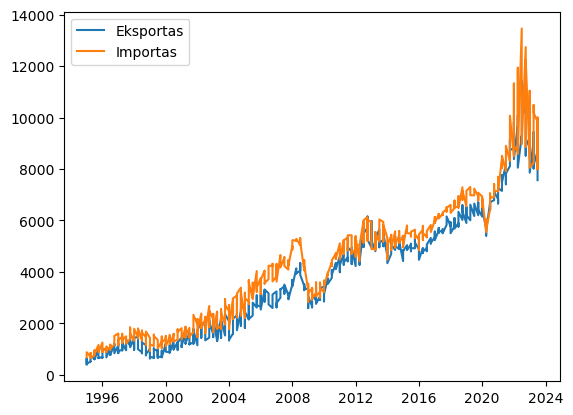

In [73]:
import matplotlib.pyplot as plt
plt.plot(t_eksportas, eksportas, label="Eksportas")
plt.plot(t_importas, importas, label="Importas")
plt.legend()
plt.show()

In [74]:
import numpy as np
from numpy import matmul
from numpy import transpose
from numpy import exp
#from numpy import linalg
from numpy.linalg import inv

In [75]:
X10 = importas.to_numpy()
X20 = eksportas.to_numpy()
print(X10[:5], X20[:5])

[681.5 733.4 809.4 875.5 695. ] [397.8 589.9 630.1 418.9 516.6]


In [76]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
if 0:
    w = 16
    X10 = moving_average(X10, w)
    X20 = moving_average(X20, w)
    n = len(X10)
    
    plt.plot(t_eksportas[(w-1):], X20, label="Eksportas")
    plt.plot(t_importas[(w-1):], X10, label="Importas")
    plt.legend()
    plt.show()

In [77]:
X1_ = X10[0]
X2_ = X20[0]
X100 = X10.copy()
X200 = X20.copy()

# Min-max normavimas
if 0:
    m = min(y)
    M = max(y)
    yn = (y-m) / (M-m) + 0.1
    kintamieji_denormavimui = [m, M]
    flag_norm = "mM"

# Dalyba iš pirmos reikšmės
if 1:
    X10 /= X1_
    X20 /= X2_
    kintamieji_denormavimui = X1_
    print(X1_, X2_)
    print("Po normavimo:", X10)
    flag_norm = "divFirst"

681.5 397.8
Po normavimo: [ 1.          1.07615554  1.18767425  1.28466618  1.01980924  1.24167278
  1.16272927  0.95201761  1.09097579  1.3269259   1.3841526   1.17842993
  1.6972854   1.55832722  1.42861335  1.27322084  1.84005869  1.51826853
  1.3002201   1.35377843  1.53646368  1.28950844  1.36008804  1.61570066
  1.40513573  1.57212032  1.71283933  1.49244314  1.71151871  1.95847395
  1.95245781  2.21790169  2.34908291  1.6785033   2.02098313  1.97314747
  2.17314747  1.80058694  2.33734409  1.96360968  2.18943507  1.87468819
  2.04871607  1.78576669  2.04578136  2.37079971  2.69347029  2.37740279
  1.93440939  2.25840059  2.28481291  2.62054292  2.15495231  2.07322084
  2.56067498  2.64137931  1.94013206  2.03345561  2.51958914  2.40939105
  2.14453412  2.00704329  1.68466618  2.46382979  2.10550257  1.36815847
  1.78517975  1.73015407  1.63683052  2.28525312  1.72472487  2.20410858
  1.9841526   1.59809244  1.88730741  1.49831255  1.91019809  1.51122524
  2.17681585  1.83286867 

In [78]:
print(flag_norm, kintamieji_denormavimui)

divFirst 681.5


In [79]:
#print(X10[:5], X20[:5])
X11 = np.cumsum(X10)
X21 = np.cumsum(X20)
#print(X11[:5], X21[:5])
len(X10), len(X11)

(460, 460)

In [80]:
n_pr = 1
n_ap = len(X10)-n_pr

a, b = ab(X11, X10, n_ap)
print(a, b)

(458, 2) (458,)
-0.004265035536142871 2.1237685691383037


In [81]:
flag_patobulinimas1 = False
flag_patobulinimas2 = False
ob2 = GM11(X11, a, b, n_ap, flag_patobulinimas1, flag_patobulinimas2, None, flag_norm, kintamieji_denormavimui)
y1p = ob2.prognozuoti(4)
ynp_beHarm, ynp2_beHarm = ob2.galutinePrognozeDenormavimas()
print('Prognozė:', np.shape(ynp_beHarm), 'Prognozė (denormuota):', np.shape(ynp2_beHarm))

Prognozė: (460,) Prognozė (denormuota): (460,)


In [82]:
flag_patobulinimas2 = True
ob2 = GM11(X11, a, b, n_ap, flag_patobulinimas1, flag_patobulinimas2, 9, flag_norm, kintamieji_denormavimui)
y1p = ob2.prognozuoti(4)
ynp_suHarm, ynp2_suHarm = ob2.galutinePrognozeDenormavimas()
print('Prognozė:', np.shape(ynp_beHarm), 'Prognozė (denormuota):', np.shape(ynp2_beHarm))

Prognozė: (460,) Prognozė (denormuota): (460,)


In [83]:


#len(t_importas[(w-1):]), len(t_p), len(ynp), len(ynp2)

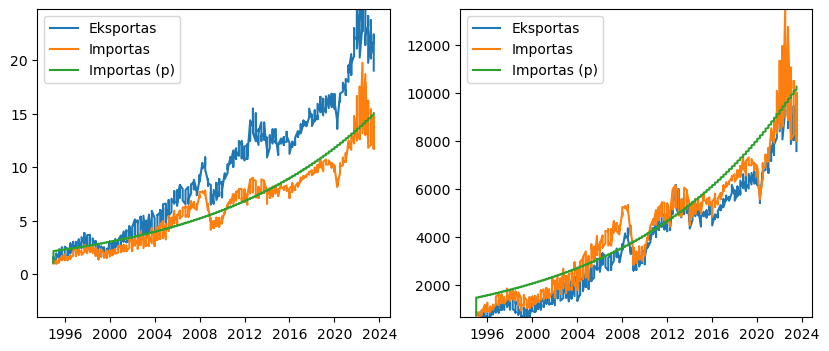

In [84]:
i0 = 0 #w-1
t_p = t_importas[i0:]
#td = t_p[-1]-t_p[-2]
#t_p = t_p.union(pd.date_range(t_p[-1] + td, periods=4, freq='Q'))

fig, ax = plt.subplots(1, 2, figsize=[10, 4])

ax[0].plot(t_eksportas[i0:], X20, label="Eksportas")
ax[0].plot(t_importas[i0:], X10, label="Importas")
ax[0].plot(t_p, ynp_beHarm, label="Importas (p)")
ax[0].set_ylim([min(X10)-5, max(X10)+5])
ax[0].legend()

ax[1].plot(t_eksportas[i0:], X200, label="Eksportas")
ax[1].plot(t_importas[i0:], X100, label="Importas")
ax[1].plot(t_p, ynp2_beHarm, label="Importas (p)")
ax[1].set_ylim([min(X100)-5, max(X100)+5])
ax[1].legend()

plt.show()

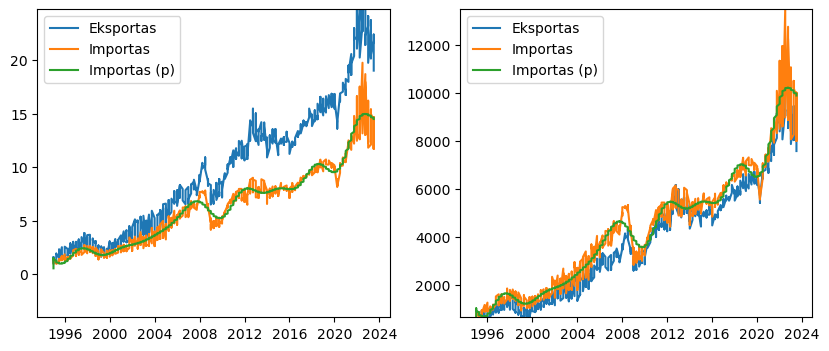

In [85]:
i0 = 0 #w-1
t_p = t_importas[i0:]
#td = t_p[-1]-t_p[-2]
#t_p = t_p.union(pd.date_range(t_p[-1] + td, periods=4, freq='Q'))

fig, ax = plt.subplots(1, 2, figsize=[10, 4])

ax[0].plot(t_eksportas[i0:], X20, label="Eksportas")
ax[0].plot(t_importas[i0:], X10, label="Importas")
ax[0].plot(t_p, ynp_suHarm, label="Importas (p)")
ax[0].set_ylim([min(X10)-5, max(X10)+5])
ax[0].legend()

ax[1].plot(t_eksportas[i0:], X200, label="Eksportas")
ax[1].plot(t_importas[i0:], X100, label="Importas")
ax[1].plot(t_p, ynp2_suHarm, label="Importas (p)")
ax[1].set_ylim([min(X100)-5, max(X100)+5])
ax[1].legend()

plt.show()

## GM(1, 1). World bank API

<a href=https://documents.worldbank.org/en/publication/documents-reports/api>https://documents.worldbank.org/en/publication/documents-reports/api</a>

In [89]:
# Inflation, consumer prices (annual %) -> FP.CPI.TOTL.ZG
parametrai = '?format=json&fl=FP.CPI.TOTL.ZG&per_page=20000&page=1'
uzklausa = f"https://api.worldbank.org/v2/country/all/indicator/FP.CPI.TOTL?{parametrai}"
#data = pd.read_csv(f"https://search.worldbank.org/api/v2/wds{uzklausa}")

In [90]:
#data = pd.read_csv(uzklausa)
#data

In [91]:
import urllib.request, json 
with urllib.request.urlopen(uzklausa) as url:
    data = json.load(url)
    #print(data)
len(data)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
data[0]

In [ ]:
data[1]

In [ ]:
import requests
url = "https://api.worldbank.org/v2/country/all/indicator/FP.CPI.TOTL"
params = {
    "format": "json",
    "per_page": 5000,
    "page": 1
} # "date": "2000:2023"
D = []
while True:
    print('Getting page', params["page"], '...')
    response = requests.get(url, params=params)
    data = response.json()
    if not data[1]:
        break
    D.extend(data[1])
    params["page"] += 1
print(len(D))

In [128]:
df_wb = pd.DataFrame(D)
df_wb

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'FP.CPI.TOTL', 'value': 'Consumer price...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2023,NaN,,,1
1,"{'id': 'FP.CPI.TOTL', 'value': 'Consumer price...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2022,NaN,,,1
2,"{'id': 'FP.CPI.TOTL', 'value': 'Consumer price...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2021,NaN,,,1
3,"{'id': 'FP.CPI.TOTL', 'value': 'Consumer price...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2020,NaN,,,1
4,"{'id': 'FP.CPI.TOTL', 'value': 'Consumer price...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2019,NaN,,,1
...,...,...,...,...,...,...,...,...
17019,"{'id': 'FP.CPI.TOTL', 'value': 'Consumer price...","{'id': 'ZW', 'value': 'Zimbabwe'}",ZWE,1964,NaN,,,1
17020,"{'id': 'FP.CPI.TOTL', 'value': 'Consumer price...","{'id': 'ZW', 'value': 'Zimbabwe'}",ZWE,1963,NaN,,,1
17021,"{'id': 'FP.CPI.TOTL', 'value': 'Consumer price...","{'id': 'ZW', 'value': 'Zimbabwe'}",ZWE,1962,NaN,,,1
17022,"{'id': 'FP.CPI.TOTL', 'value': 'Consumer price...","{'id': 'ZW', 'value': 'Zimbabwe'}",ZWE,1961,NaN,,,1


In [129]:
np.unique(df_wb['countryiso3code'])

array(['', 'ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE',
       'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ',
       'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN',
       'CEB', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG',
       'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR',
       'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST',
       'ETH', 'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB',
       'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HKG', 'HND', 'HPC', 'HRV',
       'HTI', 'HUN', 'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX', 'IMN',
       'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR',
       'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT',
       'LAC', 'L

In [133]:
df_LTU = df_wb.loc[df_wb['countryiso3code']=='LTU', ['date', 'value', 'unit', 'decimal']].sort_values(by='date')
df_LTU

,date,value,unit,decimal
10559,1960,NaN,,1
10558,1961,NaN,,1
10557,1962,NaN,,1
10556,1963,NaN,,1
10555,1964,NaN,,1
...,...,...,...,...
10500,2019,118.382098,,1
10499,2020,119.802559,,1
10498,2021,125.413564,,1
10497,2022,150.126365,,1


<Axes: xlabel='date'>

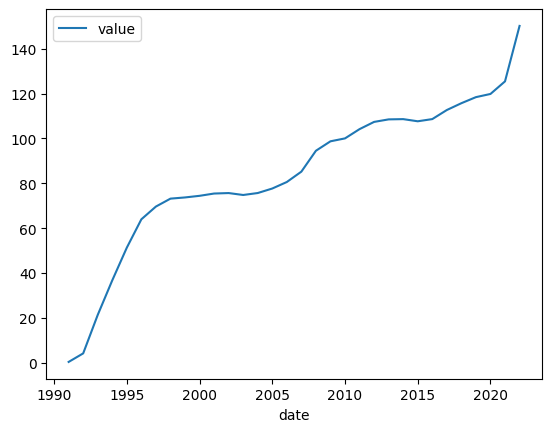

In [134]:
df_LTU.plot(x='date', y='value')

...

## Pabandymui

* Atsisiųsti papildomų duomenų iš OECD.
* Sutvarkyti duomenis.
* Panagrinėti PCA, GM(1, 1), ...

## Išvados

1. PCA.
    * Galim naudoti: dimensijų mažinimui, sąsajų paieškai, modelių konstravimui.
2. GM(1, 1)
    * Greitai suskaičiuojamas.
    * Tinka ne visoms laiko eilutėms.